# Applied Statistics : Assignment 1
#### Omkar Nitin Pawar
#### A20448802

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import random


/kaggle/input/skincancer2.txt


# Question 4

Generate the data according to given conditions



In [2]:
x = []
for i in range(0,40):
    x.append(random.uniform(-1,1)) #X in range -1 to 1
    
s = np.random.normal(0,0.1,40) # Normally distributed E

In [3]:
df = pd.DataFrame(data = x, columns = ["Xi"])
df["E"] = s

Calculate the value of y as y = 2x + E

In [4]:
df["Yi"] = 2*df["Xi"]+df["E"]

In [5]:
df.head()

,Xi,E,Yi
0,0.042358,0.040080,0.124795
1,-0.678894,-0.036894,-1.394683
2,-0.581530,-0.183731,-1.346791
3,-0.227549,0.167842,-0.287256
4,0.862021,-0.026664,1.697379


# Regression Through Origin 
Estimate of B when it is regression through origin

In [6]:
bRTO = sum(df["Xi"]*df["Yi"]) / sum(df["Xi"]**2)
bRTO

2.0563633742614518

Predict the value of Y using regression through origin

In [7]:
df["YiOrigin"] = (bRTO*df["Xi"])

In [8]:
df.head()

,Xi,E,Yi,YiOrigin
0,0.042358,0.040080,0.124795,0.087103
1,-0.678894,-0.036894,-1.394683,-1.396053
2,-0.581530,-0.183731,-1.346791,-1.195837
3,-0.227549,0.167842,-0.287256,-0.467923
4,0.862021,-0.026664,1.697379,1.772629


# Ordinary Linear Regression

Now, we calculate the values of normal regression line parameters (b0 and b1)

In [9]:
x_mean = df["Xi"].mean()
y_mean = df["Yi"].mean()

In [10]:
sum((df["Xi"] - x_mean)**2)

13.485678322261375

In [11]:
b1 = sum((df["Xi"] - x_mean)*(df["Yi"] - y_mean)) / sum((df["Xi"] - x_mean)**2) # Value of regression coefficient(Slope)
b1

2.0581243485627763

In [12]:
b0 = y_mean - (b1 * x_mean) # Value of intercept
b0

-0.010117424624756344

Predict the value of Y by using ordinary linear regression

In [13]:
df["YiHat"] = b0 + (b1*df["Xi"])

In [14]:
df.head()

,Xi,E,Yi,YiOrigin,YiHat
0,0.042358,0.040080,0.124795,0.087103,0.077060
1,-0.678894,-0.036894,-1.394683,-1.396053,-1.407366
2,-0.581530,-0.183731,-1.346791,-1.195837,-1.206979
3,-0.227549,0.167842,-0.287256,-0.467923,-0.478441
4,0.862021,-0.026664,1.697379,1.772629,1.764030


# Value of ei
Here, we find the value of error(ei) for both, regression through origin and ordinary linear regression

In [15]:
df["Ei Origin"] = df["Yi"] - df["YiOrigin"]
print("Value of ei for regression through origin =",sum(df["Ei Origin"]))

Value of ei for regression through origin = -0.4005204693961608


In [16]:
df["Ei Hat"] = df["Yi"] - df["YiHat"]
print("Value of ei for ordinary linear regression =",sum(df["Ei Hat"]))

Value of ei for ordinary linear regression = -9.992007221626409e-16


#### Comparing both the above values, it can be seen that e value is very small ordinary linear regression than regression through origin. Hence, it can be inferred that ordinary regression line is the best fit than the line passing through origin.

In [17]:
df.head()

,Xi,E,Yi,YiOrigin,YiHat,Ei Origin,Ei Hat
0,0.042358,0.040080,0.124795,0.087103,0.077060,0.037692,0.047735
1,-0.678894,-0.036894,-1.394683,-1.396053,-1.407366,0.001370,0.012683
2,-0.581530,-0.183731,-1.346791,-1.195837,-1.206979,-0.150954,-0.139812
3,-0.227549,0.167842,-0.287256,-0.467923,-0.478441,0.180667,0.191185
4,0.862021,-0.026664,1.697379,1.772629,1.764030,-0.075250,-0.066651


### R - squared values
Calculate the value of r squared for regresion through origin


In [18]:
n = len(df["Xi"])
import math
r_squared_origin = ((n*sum(df["Xi"]*df["YiOrigin"])) - (sum(df["Xi"]) * sum(df["YiOrigin"]))) / math.sqrt((n*sum(df["Xi"]**2))*((n*sum(df["YiOrigin"]**2) - ((sum(df["YiOrigin"]))**2))))

In [19]:
r_squared_origin

0.9948265650186092

Calculate the value of r squared for ordinary regression line

In [20]:
r_squared_hat = ((n*sum(df["Xi"]*df["YiHat"])) - (sum(df["Xi"]) * sum(df["YiHat"]))) / math.sqrt((n*sum(df["Xi"]**2))*((n*sum(df["YiHat"]**2) - ((sum(df["YiHat"]))**2))))
r_squared_hat

0.9948265650186093

# Question 5

In [21]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
data = pd.read_fwf("/kaggle/input/skincancer2.txt")

In [22]:
data.head()

,State,Lat,Mort,Ocean,Long
0,Alabama,33.0,210,1,87.0
1,Arizona,34.5,160,0,112.0
2,Arkansas,35.0,170,0,92.5
3,California,37.5,182,1,119.5
4,Colorado,39.0,149,0,105.5


In [23]:
# y = Mort.    x = lat
lat_mean = sum(data.Lat) / len(data.Lat)
mort_mean = sum(data.Mort) / len(data.Mort)
lat_mean , mort_mean

(39.43958333333333, 152.75)

## Estimated value for B1 (Slope of the line)

In [24]:
b1_skn = sum((data.Lat - lat_mean)*(data.Mort - mort_mean)) / sum((data.Lat - lat_mean)**2)
b0_skn = mort_mean - (b1_skn * lat_mean)
print ("Slope =", b1_skn,"Intercept =",b0_skn)

Slope = -6.031332653272506 Intercept = 390.6232467897954


## Sum of Squared

In [25]:
data["predictions"] = (data.Lat * b1_skn) + (b0_skn)
data.head()


,State,Lat,Mort,Ocean,Long,predictions
0,Alabama,33.0,210,1,87.0,191.589269
1,Arizona,34.5,160,0,112.0,182.542270
2,Arkansas,35.0,170,0,92.5,179.526604
3,California,37.5,182,1,119.5,164.448272
4,Colorado,39.0,149,0,105.5,155.401273


In [26]:
mort_mean

152.75

## SSE SSR and SST

In [27]:
SSE = sum((data.Mort - data.predictions)**2)
SST = sum((data.Mort - mort_mean)**2)
SSR = sum((data.predictions - mort_mean)**2)

print ("Sum of Squared Errors = ",SSE," \nSum of Squared due to Regression =",SSR , "\nSum of Squared Total = ",SST) 

Sum of Squared Errors =  16041.8506521439  
Sum of Squared due to Regression = 36381.149347856066 
Sum of Squared Total =  52423.0


## Hypotheses

In [28]:
import math
MSE = math.sqrt(SSE/len(data.Lat))
yyy = MSE/math.sqrt(sum((data.Lat-lat_mean)**2))

In [29]:
#TO calculate T value
from scipy import stats
ci = 95
n = 48
t = stats.t.ppf(1- ((100-ci)/2/100), n-2)
x = t*yyy

In [30]:
print("The 95% confidence interval turns out to be\n",round(b1_skn - x,3),"< B1 <",round(b1_skn + x,3))

The 95% confidence interval turns out to be
 -7.195 < B1 < -4.868


## Using functions to verify the parameters calculated above

In [31]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

train_x = data.iloc[:,1:2]
train_y = data.iloc[:,2:3]
reg.fit(train_x,train_y)

print ("Slope = ",reg.coef_,"\nIntercept = ",reg.intercept_)

Slope =  [[-6.03133265]] 
Intercept =  [390.62324679]


## Summary

In [32]:
from statsmodels.formula.api import ols
model = ols("train_y ~ train_x", data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                train_y   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     104.3
Date:                Thu, 12 Sep 2019   Prob (F-statistic):           2.07e-13
Time:                        00:37:17   Log-Likelihood:                -207.59
No. Observations:                  48   AIC:                             419.2
Df Residuals:                      46   BIC:                             422.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    390.6232     23.445     16.661      0.000     343.431     437.815
train_x       -6.0313      0.591    -10.214      0.000      -7.220      -4.843
==============================================================================
Omnibus:                        0.314   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.855   Jarque-Bera (JB):                0.496
Skew:                           0.090   Prob(JB):                        0.780
Kurtosis:                       2.535   Cond. No.                         346.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the summary, we can note the values of b0(intercept) and b1(regression coefficeint) and compare them to the values that we calculated previously. These values are similar to each other.

Also in the summary, it can be observed that the confidence interval lies between -7.220 to -4.843, which is also quite close to the values that we calculated previously.
  

## Plot

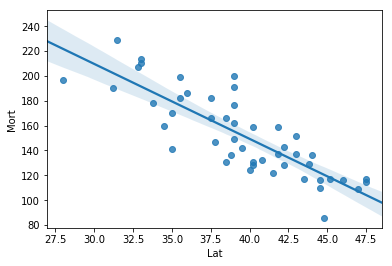

In [33]:
import seaborn as sns
sns.regplot(data.Lat,data.Mort)